# Advanced Numerical Analysis Project

 
**Acoustic waves.** The air pressure p (x, t) in an organ pipe is governed by the wave
equation:  $$\frac{\delta^2 p}{\delta t^2} =c^2 \frac{\delta^2 p}{\delta x^2}$$

where l is the length of the pipe and c is a constant. If the pipe is open, the boundary
cinditions are given by:


$p(0, t) = p_{0}$  and $p(l, t) = p_{0}.$


If the pipe is closed at the end x = l the boundary conditions are:

$p(0, t) = p_{0}$ and $\frac{\delta p}{\delta x} (l,t)= 0.$


Assume that c = 1, l = 1, and the initial conditions are:

$p(x, 0) = p_{0}  cos(2πx$), and $\frac{\delta p}{\delta x}(x, 0) = 0 , 0 ≤ x ≤ 1$.

**a)  Write down an explicit finite difference method for the wave equation and give stability conditions and the order of the method.**

A finite differences method consists of approximating partial differential equations such as the wave equation replacing the partial derivatives with their respective centered differences quotients. The domain is divided in time and space, where we approximate the solution of the equation at the spacial and time nodes $x_{j}$, for j=0,1,...,M and $t_{n}$ for n=0,1,..,N. The error between the true solution and our approximations will be called the Truncation error, and is determined by the size of the steps in space and time, which we will denote as $h=\frac{Length}{M}$ and $k=\frac{Time}{N}$.
Now, if we rewrite our equation using the differential quotients, we get the finite differences method:

$$\frac{P^{n+1}_{j}-2P^{n}_{j}+P^{n-1}_{j}}{k^2} = c^2\frac{P^{n}_{j+1}-2P^{n}_{j}+P^{n}_{j-1}}{h^2}$$ 

Where $P^n_{j}$ serves as our approximation to $p(x_{j},t_{n})$.

For the sake of the computation of this method, we can re write it as:


$$P^{n+1}_{j}= 2P^{n}_{j} - P^ {n-1}_{j}+\lambda^2(P^{n}_{j+1}-2P^{n}_{j}+P^{n}_{j-1})$$

where $\lambda = (\frac{ck}{h})$.


To determine the *stability conditions* of our scheme, we will aply the Von Neumann Stability analysis. This method consists of replacing an approximation $P^n_{j}$ with a single Fourier node $\xi^n e^{imjh}$. We now re write our method using this separated solution:


$\xi^{n+1} e^{imjh} = 2\xi^n e^{imjh} - \xi^{n-1} e^{imjh}+ \lambda^2(\xi^n e^{im(j+1)h}-2\xi^n e^{imjh}+\xi^n e^{im(j-1)h})$

If we cancel $\xi^n e^{imjh}$, we are left with:

$\xi= 2 - \frac{1}{\xi} + \lambda^2(e^{imh}-2+e^{-imh})$. using trigonometric identities and collecting $\xi's$ on our left side we get:

$\xi - 2 +\frac{1}{\xi} = -4\lambda^2sin^2(\frac{\theta}{2})$ or $(\sqrt{\xi}-\frac{1}{\sqrt{\xi}})^2 = (\pm 2*i\lambda*sin(\frac{\theta}{2}))^2$ , where $\theta=mh$.

by finding $\xi$, this equation becomes quadratic for $\sqrt{\xi}$, such that

$\xi_{\pm} = (\sqrt{1-\lambda^2sin^2(\frac{\theta}{2})} \pm 2*i\lambda sin(\frac{\theta}{2}))^2$.

*Based on this, we can then say $|\xi| \le 1$ only if $|\lambda| \le 1$, meaning our finite difference scheme is stable if and only if $|\lambda| \le 1$ .*


To determine the order of the scheme, we go back to our Truncation error, and define it as:

$T^n_{j} = c^2P_{tt} - P_{xx} = 0$ .

As we mentioned previously, the truncation error measures how close our approximations$P^n_{j}$ are to a true solution p(xj,tn). To more accurately show this, we define our partials $\frac{\delta^2 p}{\delta t^2}$ and $\frac{\delta^2 p}{\delta x^2}$ as:

$\frac{\delta^2 p}{\delta t^2} = \frac{P^{n+1}_{j}-2P^{n}_{j}+P^{n-1}_{j}}{k^2}  + O(k^2)$ and 

$\frac{\delta^2 p}{\delta x^2}= c^2\frac{P^{n}_{j+1}-2P^{n}_{j}+P^{n}_{j-1}}{h^2} + O(h^2).$

*Based on this, we can easily say our truncation error $T^n_{j} = O(k^2) +  O(h^2)$, which means our scheme is second order in time and space.*

**b) Implement your method given in a) for the open pipe with p0 = 0.9, and with
step sizes k = h = 0.05. Plot your numerical solution at t = 0.5 and t = 1.0.**

We will now evaluate our method using python with the given conditions above. To do this, we will create a function called Wave_Eq_Open to specify this function will only work with the initial conditions in which the pipe has no closed ends. The function will have inputs $L$ , which is the spacial length we wish to cover, $T$ being the total time we want to iterate for, $h$ being the step size we want to take in space, $k$ as the step size for time, and $c$ as our constant multiplying $\frac{\delta^2 p}{\delta x^2}$. The function will use the finite differences scheme we developed and find the value for $P^{n+1}_{j}$ at every $j=1,...,M-1$. $j=0$ and $j=M$ are values given to us by the boundary condition above. The function will then find these approximations for every n value until we reach time T. The output will be three graphs, one plotting the scheme showing our approximation at time t=0, a second graph plotting the approximation at time t=0.5, and a third at t=1.0.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def Wave_Eq_Open(L,T,h,k,c):
    
## This is our boundary condition
    po=0.9
## This is our defined initial condition    
    def p(x):   
        return(po*np.cos(2*np.pi*x))
## array will hold every xj node in space
    X=[]
## number of steps taken in space depending on h, our step size
    M=int(L/h) 
## here we create the Space nodes
    for i in range(round(M+1)):    
        xj=i*h
        X.append(xj) 
## We use our initial condition to create Po(x), our solution at t=0.
    Pm1=[po]                
    for i in range(1,len(X)):
        y=p(X[i])
        Pm1.append(y)
##Since our second initial condition is =0, our approximation at n=1 is the same as n=0.   
    Pn=Pm1     
    P=[Pm1,Pn]
    t=0+k  
##Here we will plot the Initial condition (t=0) for reference
    plt.plot(X,Pm1)
    plt.xlabel("xj")
    plt.ylabel("Pn")
    plt.title("t=0")
    plt.xlim(0,1)
    plt.ylim(-0.9,0.9+1.8)
    plt.show()
## here we create a loop that will give us approximations at every time step.    
    while t<=T:   
        Pp1=[po]
        Pm1=P[-2]
        Pn=P[-1]
## This loop finds approximations for every xj node at P n+1.
        for j in range(1,len(Pm1)-1):   
            pplus1=2*Pn[j]-Pm1[j] +(c*k/h)**2*(Pn[j+1]-2*Pn[j]+Pn[j-1])
            Pp1.append(pplus1)
        Pp1.append(po)
        t=t+k
        P.append(Pp1)
### This if loop will get the function to plot the air pressure when t=0.5      
        if round(t,2)==T/2:
            plt.plot(X,Pp1)
            plt.xlabel("xj")
            plt.ylabel("Pn")
            plt.title("t=0.5")
            plt.xlim(0,1)
            plt.ylim(-0.9,0.9+1.8)
            plt.show()
### This if loop will get the function to plot the air pressure when t=1.0                
        if round(t,2)==T:
            plt.plot(X,Pp1)
            plt.xlabel("xj")
            plt.ylabel("Pn")
            plt.title("t=1.0")
            plt.xlim(0,1)
            plt.ylim(-1,0.9+1.8)
            plt.show()
        

Now, we will run the function we created with $p_{0}$ = 0.9, c=1, step sizes k = h = 0.05 for 1 second.

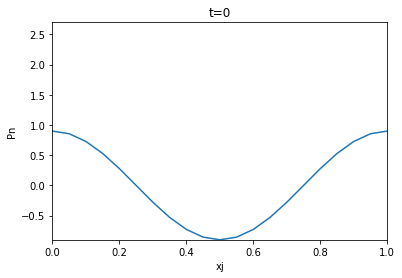

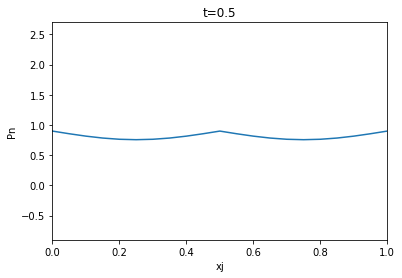

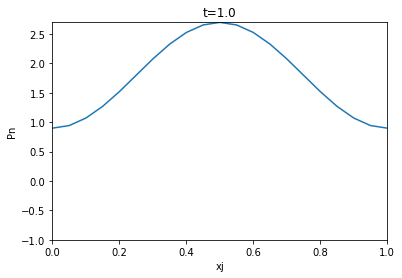

In [16]:
Wave_Eq_Open(1,1,0.05,0.05,1)

As we see, the graphs represent the movement of our function as time passes, in a way that can be described as a vibrating string.

**c) Implement your method given in a) for the closed pipe at x = l with p0 = 0.9,
and with step sizes k = h = 0.05. Plot your numerical solution at t = 0.5 and
t = 1.0.**

Now, we are asked to evaluate our method again, this time under the boundary conditions in which our pipe is closed at x=1. To solve this, we create another function, called Wave_Eq_Closed, which will have the same inputs and outputs as our last function. The function will also find approximations for $P^{n+1}_{j}$ at every $j=1,...,M-1$, with the only difference being that now $P^{n+1}_{M}$ is unknown as well due to the closed pipe boundary condition. To find $P^{n+1}_{M}$, we use the condition $\frac{\delta p}{\delta x} (l,t)= 0$ to show that $\frac{P^{n}_{M+1}-P^{n}_{M-1}}{2h}=0$. This equality lets us re write our scheme for $P^{n+1}_{M}$ as:

$P^{n+1}_{M} = 2P^n_{M}-P^{n-1}_{M}+\lambda^2(2(P^n_{M-1}-P^n_{-M}))$.

After finding our $Mth$ approximation for $P^{n}$, we then iterate for every time node until we reach our desired time T. Now, lets create the function.

In [17]:
def Wave_Eq_Closed(L,T,h,k,c):
    
## This is our boundary condition
    po=0.9
## This is our defined initial condition    
    def p(x):   
        return(po*np.cos(2*np.pi*x))
## array will hold every xj node in space
    X=[]
## number of steps taken in space depending on h, our step size
    M=int(L/h) 
## here we create the Space nodes
    for i in range(round(M+1)):    
        xj=i*h
        X.append(xj) 
## We use our initial condition to create Po(x), our solution at t=0.
    Pm1=[po]                
    for i in range(1,len(X)):
        y=p(X[i])
        Pm1.append(y)
##Since our second initial condition is =0, our approximation at n=1 is the same as n=0.   
    Pn=Pm1     
    P=[Pm1,Pn]
    t=0+k  
##Here we will plot the Initial condition (t=0) for reference
    plt.plot(X,Pm1)
    plt.xlabel("xj")
    plt.ylabel("Pn")
    plt.title("t=0")
    plt.xlim(0,1)
    plt.ylim(-0.9,0.9+1.8)
    plt.show()
## here we create a loop that will give us approximations at every time step.    
    while t<=T:   
        Pp1=[po]
        Pm1=P[-2]
        Pn=P[-1]
## This loop finds approximations for every xj node at P n+1.
        for j in range(1,len(Pm1)-1):   
            pplus1=2*Pn[j]-Pm1[j] +(c*k/h)**2*(Pn[j+1]-2*Pn[j]+Pn[j-1])
            Pp1.append(pplus1)
        Pp1M=2*Pn[-1]-Pm1[-1]+(c*k/h)**2*(2*(Pn[-2]-Pn[-1]))
        Pp1.append(Pp1M)
        t=t+k
        P.append(Pp1)
### This if loop will get the function to plot the air pressure when t=0.5      
        if round(t,2)==T/2:
            plt.plot(X,Pp1)
            plt.xlabel("xj")
            plt.ylabel("Pn")
            plt.title("t=0.5")
            plt.xlim(0,1)
            plt.ylim(-0.9,0.9+1.8)
            plt.show()
### This if loop will get the function to plot the air pressure when t=1.0                
        if round(t,2)==T:
            plt.plot(X,Pp1)
            plt.xlabel("xj")
            plt.ylabel("Pn")
            plt.title("t=1.0")
            plt.xlim(0,1)
            plt.ylim(-1,0.9+1.8)
            plt.show()

Let's run the function to see how the approximations differ with a closed end at times t=0, t=0.5 and t=1.0.

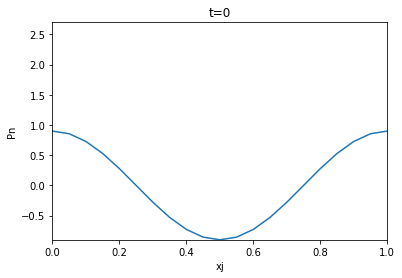

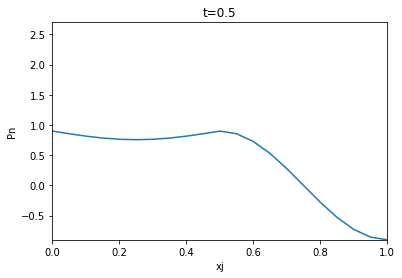

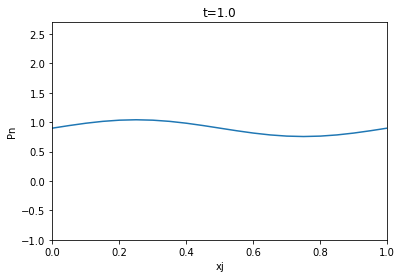

In [18]:
Wave_Eq_Closed(1,1,0.05,0.05,1)

The backward Euler's method difference scheme is a Finite Difference method defined as follows:

$$\frac{U^{n+1}_{j}-U^n_{j}}{k} = \sigma \frac{U^{n+1}_{j+1}-2U^{n+1}_{j}+U^{n+1}_{j-1}}{h}$$

Where $U^n_{j}$ is an approximation to the tempterature at nth node in time in the jth space node. Here, we define k as the step size in time such that $k = \frac{T}{N}$ and h is the step size in space where $h = \frac{L}{M}$.


$f(x + ∆x) = f(x) + ∆xf′
(x) + ∆x
2
2! f
′′(x) + ∆x
3
3! f
(3)(x) + ∆x
4
4! f
(4)(x) + . . .$

**d) Repeat b) for k = h = 0.025. Construct a higher order approximation by extrapolating your numerical solutions corresponding to k = h = 0.05 and k = h = 0.025.
What’s the order of the new approximation.**

Let's start by applying our open function under the new values given:

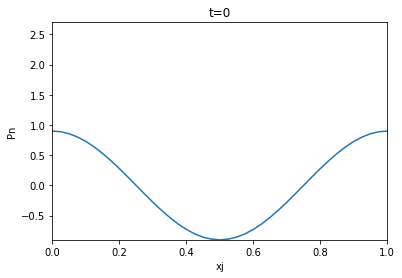

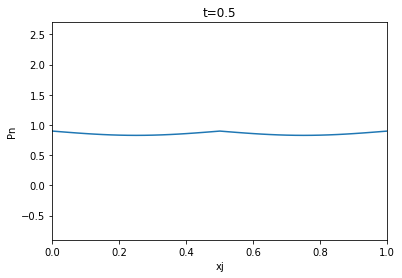

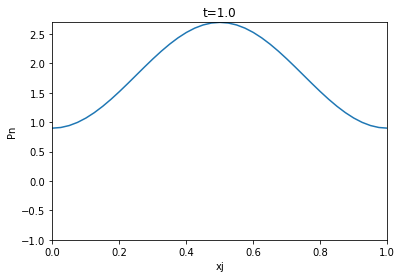

In [19]:
Wave_Eq_Open(1,1,0.025,0.025,1)

We see similar results, and notice the curves are smoother due to the smaller step sizes $k$ and $h$. As we saw in our definition of the Truncation error, the smaller these steps are, the closer we will be to the true solution we are trying to approximate. This backs up the graphs above being slighly smoother than the ones we found in part b of this analysis.

Now, let's find a way to construct a higher order method. To do this, we will utilize a process called Richardson extrapolation. We must note that the proof to turn the method to a higher order will be proved for the time variable, but the same thing can be done for space. We start by recalling the definition of our Truncation error:

$T^n_{j} = \frac{P^{n+1}_{j}-2P^{n}_{j}+P^{n-1}_{j}}{k^2}-c^2\frac{P^{n}_{j+1}-2P^{n}_{j}+P^{n}_{j-1}}{h^2} + O(k^2) + O(h^2)$.

Since we are focusing on time, let's focus on our centered difference approximation $\frac{\delta^2 p}{\delta t^2} \approx \frac{P^{n+1}_{j}-2P^{n}_{j}+P^{n-1}_{j}}{k^2} + O(k^2)$ and label the approximation as $U(k) = \frac{P^{n+1}_{j}-2P^{n}_{j}+P^{n-1}_{j}}{k^2}$.

Now, we are told we can use $k=0.05$ and $k=0.025$ to find a method with a higher order, so for the sake of simplicity lets just call $k=0.05$ and $\frac{k}{2}=0.025.$

Let's write the approximation as its Taylor series, such that:

$U(k) = U + C_{2}k^2 + C_{4}k^4 + ...$

and

$U(\frac{k}{2}) = U + C_{2}\frac{k^2}{4} + C_{4}\frac{k^4}{16} + ...$ , where $C_{j}$ are simply constants.

If we multiply the second series by 4, then subtract $4U(\frac{k}{2}) - U(k)$, and then divide by 3, will reach:


$$\frac{4U(\frac{k}{2})-U(k)}{3} = U + C_{4}k^4 + ...$$

This process has become a new approximation and is is now $O(k^4)$ instead of $O(k^2)$, meaning we have succesfully used our values $k=0.05$ and $k=0.025$ to extrapolate a higher order of approximation in time. With this extrapolation process, we can now say $T^n_{j} = O(k^4) + O(h^2)$.
